In [26]:
import json, urllib
import plotly.graph_objects as go
import plotly
import pandas as pd
import numpy as np
import os
# plotly.offline.init_notebook_mode(connected=True)

In [27]:
df = pd.read_csv('../data/sankey_mappings_alex_strat_summary.txt')
df = df.groupby(['source','target','weight'], as_index=False).size()
df['color'] = "#EEB920"
# df['color'] = "k"
df_values = pd.DataFrame(data=np.unique(df[['source','target']].values.flatten()),columns=['names'])
df_values = df_values.reset_index()
df_values = df_values.rename(columns={'index':'unique_ix'})
df_values.index = df_values['names']
df_values.head()


,unique_ix,names
names,,
Bio/Eco Monitoring,0,Bio/Eco Monitoring
Bulletins,1,Bulletins
Climate Indicators,2,Climate Indicators
Coastal Obs. Network,3,Coastal Obs. Network
Curated Data View,4,Curated Data View


In [33]:

color_map = {
    'Fishing Industry':"#EA5C21",
    'Recreational User':"#EA5C21",
    'Fisheries Planners':"#EA5C21",
    'Ocean Planners':"#EA5C21",
    'Tribes':"#EA5C21",
    'Shellfish Growers':"#EA5C21",
    'Sanctuaries':"#EA5C21",
    'Mobile Application': '#EEB920',
    'Curated Data View':"#EEB920",
    'Interactive Exhibits': "#EEB920",
    'Climate Indicators': "#EEB920",
    'Interactive Infographics': "#EEB920",
    'Dynamic Management Tools': "#EEB920",
    'Ecosystem Indicators': "#EEB920",
    'Bulletins': "#EEB920",
    'Port-lets': "#EEB920",
    "HFR":"#005C90",
    "Satellite Products":"#005C90",
    "Gliders":"#005C90",
    "Models":"#005C90",
    "Coastal Obs. Network":"#005C90",
    "HABMAP":"#005C90",
    "Bio/Eco Monitoring":"#005C90",
    "OAH Network":"#005C90",
    "Currents":"#EF8557",
    "Temperature":"#EF8557",
    "Salinity":"#EF8557",
    "Waves":"#EF8557",
    "Wind":"#EF8557",
    "Dissolved Oxygen":"#69A297",
    "Nutrients":"#69A297",
    "pH":"#69A297",
    "pCO2":"#69A297",
    "Kelp Biomass":"#50808E",
    "Marine Mammal Occurrence":"#50808E",
    "Seabird Occurrence":"#50808E",
    "Zooplankton Biomass":"#50808E",
    "Phytoplankton Biomass":"#50808E",
}

In [34]:
df_values['color'] = df_values['names'].map(color_map)
# df.groupby(['source','color']).first()

In [35]:
df['source_ix'] = df['source'].replace(df_values['unique_ix'])
df['target_ix'] = df['target'].replace(df_values['unique_ix'])
df.head()

,source,target,weight,size,color,source_ix,target_ix
0,Bio/Eco Monitoring,Kelp Biomass,1,1,#EEB920,0,16
1,Bio/Eco Monitoring,Marine Mammal Occurrence,1,1,#EEB920,0,17
2,Bio/Eco Monitoring,Phytoplankton Biomass,1,1,#EEB920,0,23
3,Bio/Eco Monitoring,Seabird Occurrence,1,1,#EEB920,0,29
4,Bio/Eco Monitoring,Zooplankton Biomass,1,1,#EEB920,0,35


In [36]:
sources = df['source_ix'].values
target  = df['target_ix'].values
label = df_values['names'].values
value = df['weight'].values
colors = df_values['color'].values
# ["#264653","#2A9D8F"],

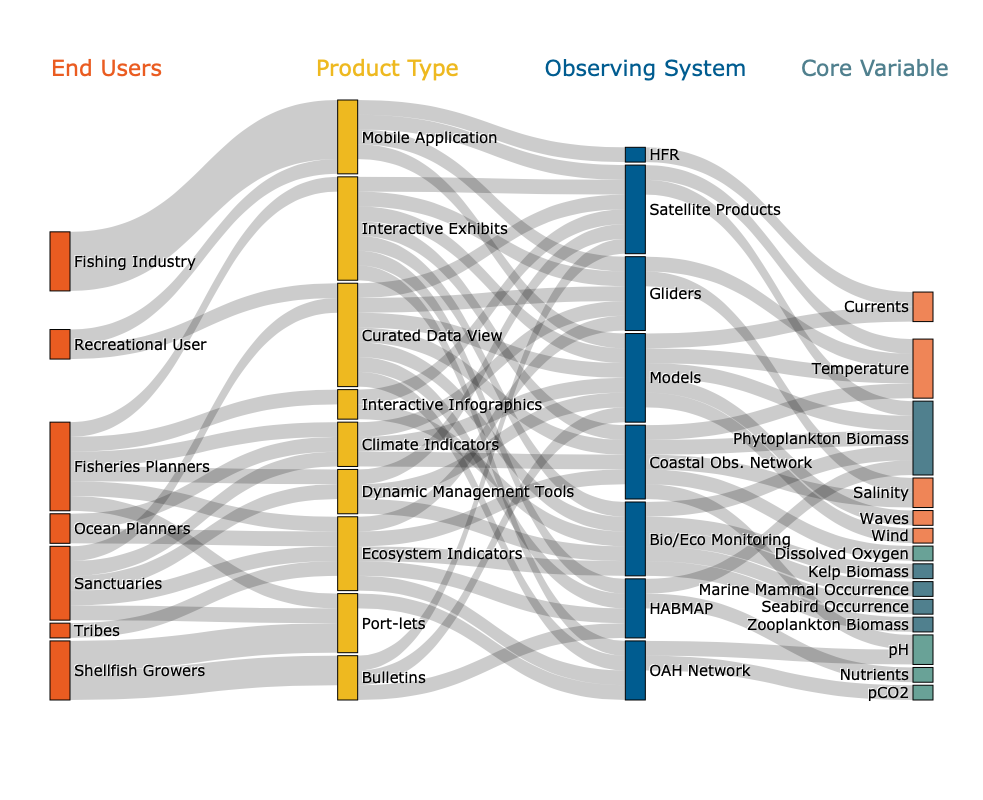

In [37]:
fig = go.Figure(data=[go.Sankey(
    arrangement = 'perpendicular',
    node = dict(
      pad = 3,
      thickness = 20,
      line = dict(color = "black", width = 1),
        label=label,
        color = colors
    ),
    link = dict(
      source = sources, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = value,
      )

    )],
    layout=dict(
        annotations=[
            dict(
                x=0,
                y=1.08,
                text='End Users',
                showarrow=False,
                 font=dict(
                    size=22,
                    color="#EA5C21"
                    ),
            ),
            dict(
                x=.3,
                y=1.08,
                text='Product Type',
                showarrow=False,
                 font=dict(
                    size=22,
                    color="#EEB920"
                    ),
            ),dict(
                x=.79,
                y=1.08,
                text='Observing System',
                showarrow=False,
                 font=dict(
                    size=22,
                    color="#005C90"
                    ),
            ),dict(
                x=1.02,
                y=1.08,
                text='Core Variable',
                showarrow=False,
                 font=dict(
                    size=22,
                    color="#50808E"
                    ),
            ),]
               ))


fig.update_layout(
    title_text="", 
    font_size=15,
    autosize=True,
    width=1050,
    height=800,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=3
    ),
)



### Write out to HTML ###

In [38]:
fname = "../output/html/sankey_v8.html"
fig.write_html(fname)

In [39]:
def copy_file_to_webserver(FILE):
    """Copy images from to webserver where they can be viewed publically."""
    try:
        os.system('scp -i /etc/ssh/keys/pdaniel/scp_rsa {} skyrocket8.mbari.org:/var/www/html/data/strat-plots/ '.format(FILE))
    except:
        pass

copy_file_to_webserver(fname)

### Save as png ###

In [40]:
fig.write_image("../output/static-images/sankey_v2.png")